In [13]:
from astropy.io import fits
from astropy.table import Table

# Path to your FITS file
data_path = '/Users/marchuertascompany/Documents/data/NGDEEP/'
fits_file = data_path+'NGDEEP_v0.3_photom.fits'

# Use Astropy to open the FITS file and extract the table
with fits.open(fits_file) as hdul:
    # The FITS file could contain more than one table; assuming the table of interest is the first one (index 1)
    # If your data is in a different HDU, you'll need to change the index accordingly
    data = hdul[1].data  # This extracts the data from the second HDU assuming it is a table
    
    # Convert the FITS table data into an Astropy Table for easier handling
    table = Table(data)

# Now 'table' contains the data from your FITS file as an Astropy Table
# You can display the first few rows to check the table
print(table[:10])  # Print the first 10 rows to check the data
print(table.columns)


 ID         RA         ...           FLUX_814_APER_NATIVE          
--- ------------------ ... ----------------------------------------
  1  53.26857970594135 ... 3024.0926818140424 .. 10944.644146299714
  3  53.26837348441046 ... 28741.330287162196 .. 30175.131415377462
 73 53.249619502851225 ...   6.786469121711397 .. 5.356547885557989
108  53.25046725136752 ...   34.47974529696968 .. 15.30395048387974
111  53.24944273761021 ...   16.62677907840991 .. 67.54995731854176
112  53.25098169208631 ... 3.6864619372047285 .. 11.346570514205997
119  53.24941209584873 ...    5.09601540425896 .. 7.848433479141389
121  53.25209254346493 ...    90.837563372968 .. 125.83081249096472
126  53.25106689183763 ...  24.852053771277436 .. 64.91191926380682
136  53.24962198395282 ... 3.1380860669059247 .. 107.64798283632145
<TableColumns names=('ID','RA','DEC','X','Y','APCORR','APCORR_APER','KRON_RADIUS','A_IMAGE','B_IMAGE','THETA_IMAGE','RH_F200W','RH_F277W','FWHM_F200W','FLUX_115','FLUXERR_115','FLUX_15

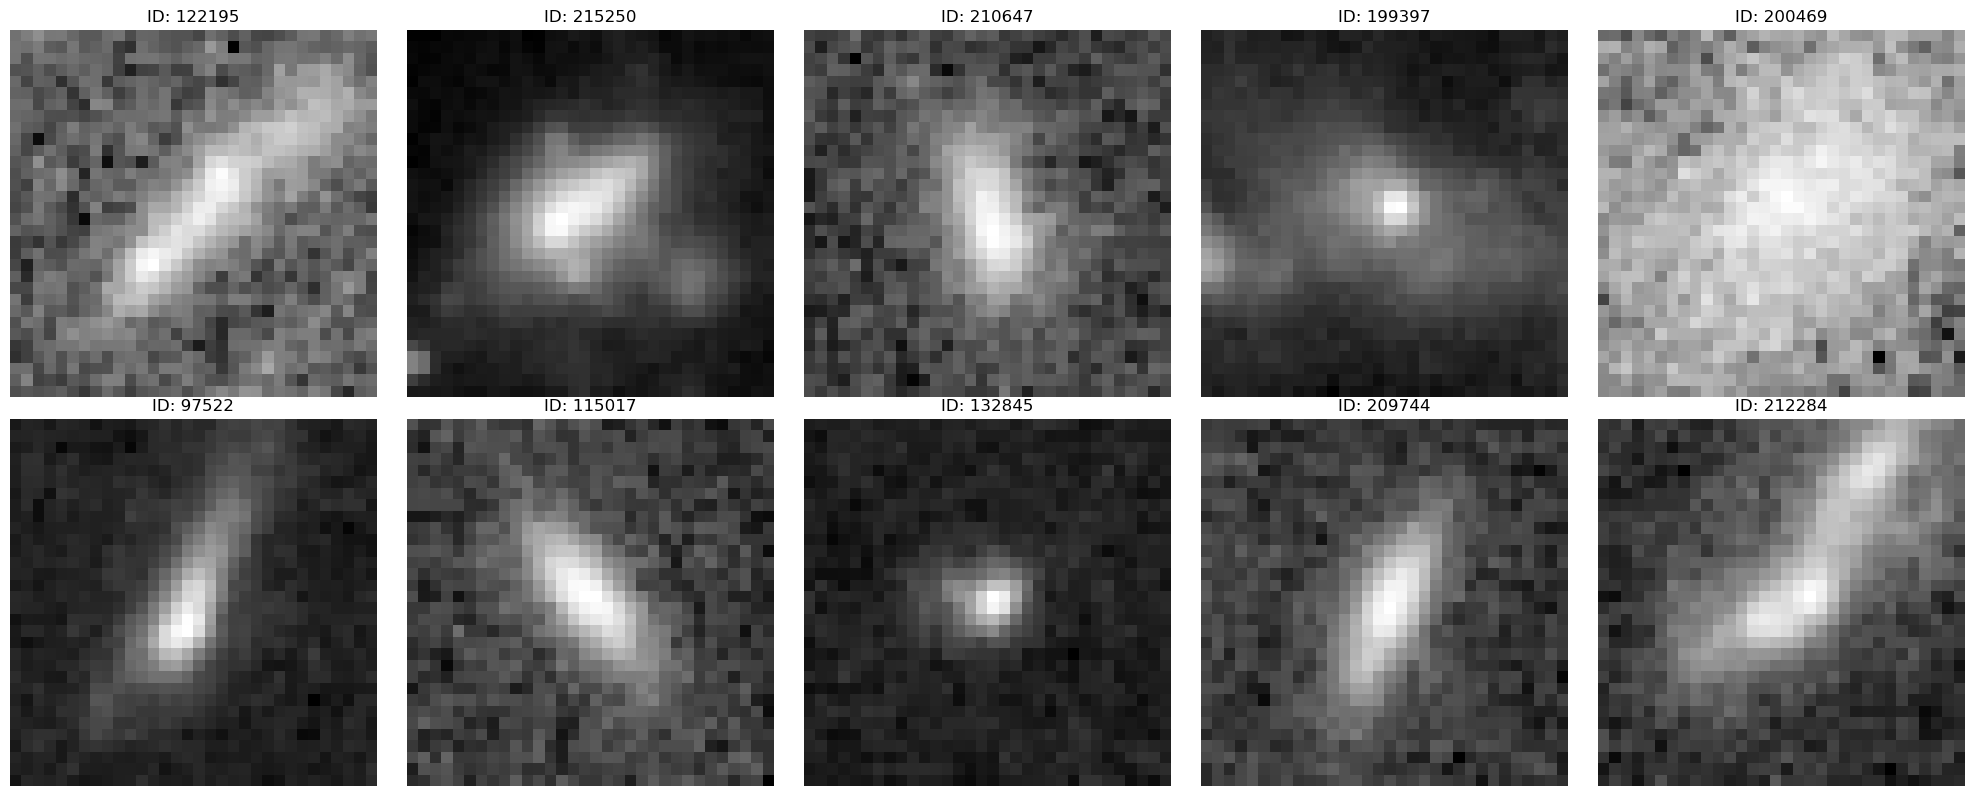

In [30]:
data_JADES='/Users/marchuertascompany/Documents/data/JADES/'
import numpy as np
import matplotlib.pyplot as plt

# Load your data
f='f150w'
data = np.load(data_JADES + 'image_arrays_' + f + '.npz', allow_pickle=True)

# Access the images
X_JWST = data['stamps']

# Choose 10 random indices without replacement
num_images = X_JWST.shape[0]
random_indices = np.random.choice(num_images, 10, replace=False)

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # Adjust the size as necessary

# Iterate through the randomly selected indices and plot each image
for i, idx in enumerate(random_indices):
    # The image data might need reshaping or squeezing if it has an extra dimension (like [32, 32, 1])
    img = X_JWST[idx].squeeze()  # Squeeze to remove single-dimensional entries from shape

    # Plot the image on the corresponding subplot
    ax = axes[i // 5, i % 5]  # Integer division and modulus for positioning
    ax.imshow(img, cmap='gray')  # 'gray' colormap seems appropriate for single-channel images
    ax.axis('off')  # Remove axis ticks and labels
    ax.set_title(f'ID: {data["idvec"][idx]}')  # Set title with the ID of the image

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [10]:
import subprocess

# Define the STILTS command for matching two CSV tables based on 'id' column
stilts_cmd = [
    'java', '-jar', '/Applications/TOPCAT.app/Contents/Java/topcat-full.jar', '-stilts',
    'tmatch2',
    'in1=/Users/marchuertascompany/Documents/data/JWST/combined/CEERS_combined_adversarial_asinh_f150w_Mar-23-2024_4class_shuffle_10_50.csv', 'in2=/Users/marchuertascompany/Documents/data/JWST/combined/CEERS_combined_adversarial_asinh_f200w_Mar-24-2024_4class_shuffle_10_50.csv',  # Input table filenames
    'out=/Users/marchuertascompany/Documents/data/JWST/combined/matched_table.csv',             # Output table filename
    'ifmt1=csv', 'ifmt2=csv',            # Input file formats
    'matcher=exact',                     # Use exact matching
    'join=1and2',                        # Determines how rows from the two tables are combined
    'find=best',                         # Find best match; use 'all' for all matches
    'keys1=id', 'keys2=id'               # Columns to match on in table1 and table2
]

# Execute the command
subprocess.run(stilts_cmd, check=True)


values1 - Table 1 match value expressions (Matched_Value): 

KeyboardInterrupt: 

In [4]:
import pystilts
pystilts.tmatch2(in1='/Users/marchuertascompany/Documents/data/JWST/combined/CEERS_combined_adversarial_asinh_f150w_Mar-23-2024_4class_shuffle_10_50.csv', 
in2='/Users/marchuertascompany/Documents/data/JWST/combined/CEERS_combined_adversarial_asinh_f200w_Mar-24-2024_4class_shuffle_10_50.csv',
out='/Users/marchuertascompany/Documents/data/JWST/combined/CEERS_combined_adversarial_asinh_Mar-24-2024_4class_shuffle_10_50_f150w_f200w.csv', matcher='exact', join='1and2',find='best',values1='fullname', values2='fullname',ifmt1='csv', ifmt2='csv')

Params:
Tuning:
Processing: Split, BasicParallel
Binning rows for table 2......................................................
24951 row refs for 24951 rows in 24951 bins
(average bin occupancy 1.0)
Scanning rows for table 1.....................................................
Eliminating multiple row references...........................................
Elapsed time for match: 0 seconds
Populate index maps...........................................................



In [4]:
pystilts.tmatch2(in1=filename1, in2=filename2, out=filename3,
                 matcher='sky', values1='ra dec', values2='ra dec',
                 join='1and2', radius='1')

NameError: name 'filename1' is not defined